In [59]:
import pandas as pd

In [60]:
import numpy as np

In [61]:
import matplotlib.pyplot as plt

In [62]:
import seaborn as sns

In [63]:
df= pd.read_csv("Sentiment_Ergebnisse.csv")

In [64]:
df.head(10)

,text,Firmen,sentiment,confidence
0,"[rt AT_USER summary of ""yesterdays"" webcast fe...",AAPL,neutral,0.876423
1,[itv will boost apple aapl apple],AAPL,positive,0.560735
2,[iphone users are more intelligent than samsun...,AAPL,positive,0.630616
3,[2013 wrap-up and trading set review - part ii...,AAPL,neutral,0.874501
4,[apple screwed up big time amzn aapl],AAPL,negative,0.890114
5,[ aapl - wall st . kicks off new year on lower...,AAPL,neutral,0.690259
6,"[rt AT_USER ""heres"" how apple could be making ...",AAPL,neutral,0.538357
7,[rt AT_USER our top 3 trade ideas for 2014 and...,AAPL,positive,0.553670
8,[AT_USER aapl having breathing difficulties],AAPL,negative,0.656353
9,"[emylers : ""cheekys"" board ! : aapl up to dat...",AAPL,neutral,0.878323


In [65]:
# Stimmung


In [66]:
Stimmung = df["sentiment"].value_counts()

In [67]:
Stimmung

sentiment
neutral     34019
positive     5689
negative     2938
Name: count, dtype: int64

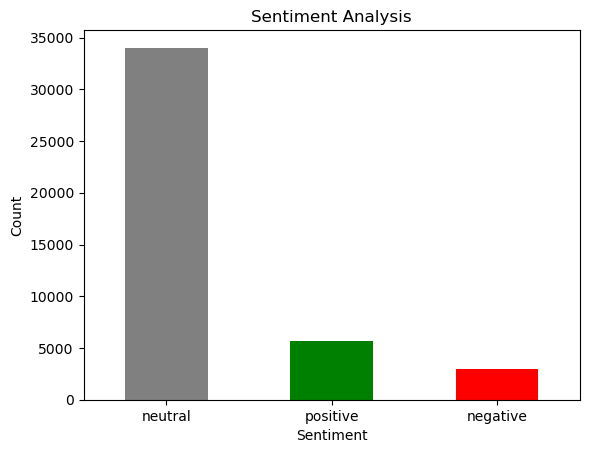

In [68]:
sentiment_counts = df['sentiment'].value_counts()

# Balkendiagramm erstellen
sentiment_counts.plot(kind='bar', color=['gray', 'g', 'r'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [69]:
df[df["Firmen"]=="BCH"]

,text,Firmen,sentiment,confidence
20795,[banco de chile ( bch ) 76.87 bch how tax ref...,BCH,neutral,0.851236
20796,"[ bch banco de chile - - ""moodys"" assigns aa3 ...",BCH,neutral,0.843655
20797,[ bch june - stock dividends ],BCH,neutral,0.895649
20798,[ bch : middle class is key to any investment ...,BCH,neutral,0.818451
20799,"[jbem """" pick rxii upcoming catalyst : read he...",BCH,neutral,0.875469
20800,[banco de chile sees large volume increase bch ],BCH,neutral,0.536988
20801,[bch -1.53 % stock charts bch banco de chile ...,BCH,neutral,0.824517
20802,[ bch - thestreet lowers banco de chile bch to...,BCH,neutral,0.866429


In [70]:
df["Firmen"].value_counts()

Firmen
AAPL    14576
META     6064
AMZN     3965
GOOG     3885
BABA     2254
D        2087
MSFT     1883
INTC     1466
CSCO     1110
WMT      1057
KO       1008
V         797
MA        543
ORCL      485
SLB       406
PEP       360
BHP       299
HON       234
TM        159
BCH         8
Name: count, dtype: int64

<Axes: xlabel='Firmen'>

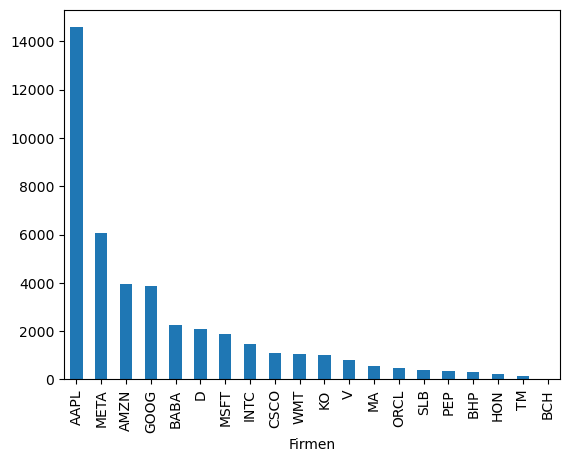

In [71]:
df["Firmen"].value_counts().plot(kind="bar")

<Axes: xlabel='Firmen'>

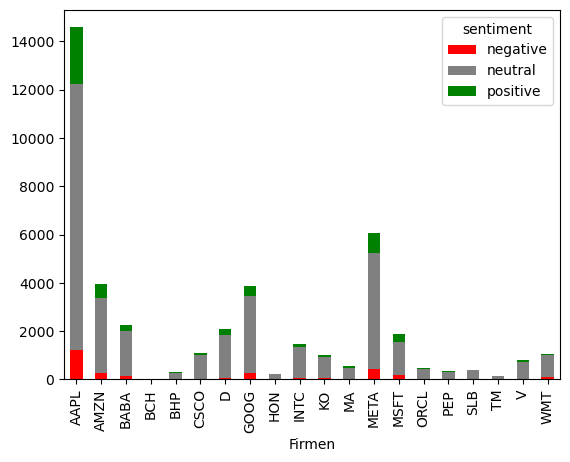

In [72]:
df.groupby(["Firmen", "sentiment"]).size().unstack().plot(kind="bar",color=['red', 'gray', 'g'], stacked=True)

<Axes: xlabel='tweet_length'>

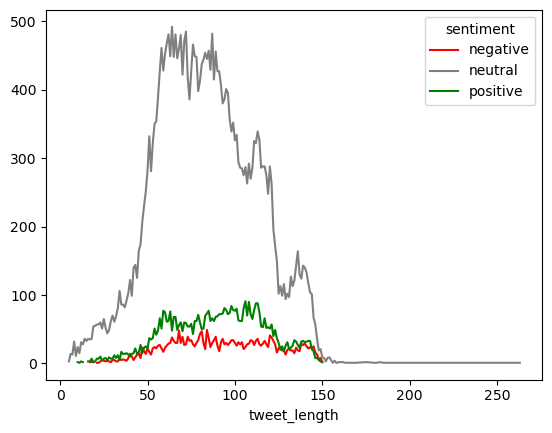

In [73]:
df["tweet_length"]= df["text"].apply(len)
df.groupby(["tweet_length","sentiment"]).size().unstack().plot(kind="line",color=['red', 'gray', 'g'], stacked=False)

In [74]:
text_sentiment_at_20000 = df.loc[20000, ["text", "sentiment"]]

In [75]:
text_sentiment_at_20000

text         [psid positiveid corp . current price   psid  ...
sentiment                                              neutral
Name: 20000, dtype: object

In [76]:
df.iloc[20000]

text            [psid positiveid corp . current price   psid  ...
Firmen                                                       BABA
sentiment                                                 neutral
confidence                                               0.855795
tweet_length                                                   87
Name: 20000, dtype: object

In [77]:
text_len= []
for text in df["text"]:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [78]:
df["text_len"]=text_len

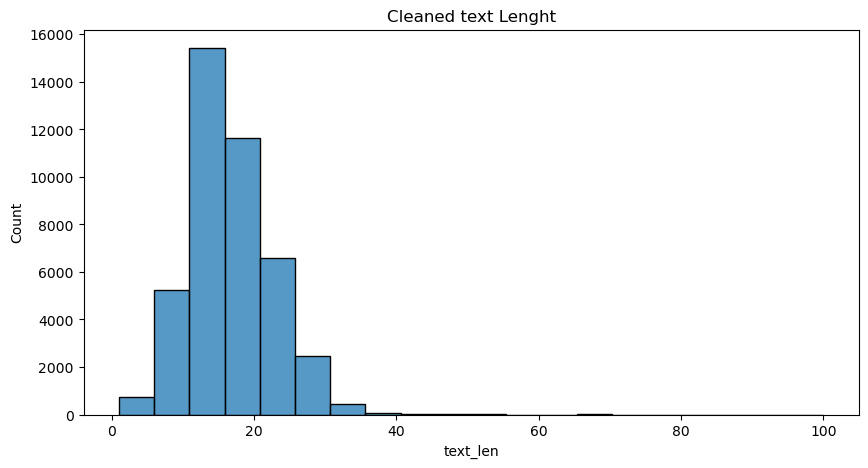

In [79]:
plt.figure(figsize=(10, 5))
sns.histplot(x="text_len", data=df, bins=20)
plt.title("Cleaned text Lenght")
plt.show()

In [80]:
df

,text,Firmen,sentiment,confidence,tweet_length,text_len
0,"[rt AT_USER summary of ""yesterdays"" webcast fe...",AAPL,neutral,0.876423,124,17
1,[itv will boost apple aapl apple],AAPL,positive,0.560735,35,6
2,[iphone users are more intelligent than samsun...,AAPL,positive,0.630616,90,14
3,[2013 wrap-up and trading set review - part ii...,AAPL,neutral,0.874501,113,21
4,[apple screwed up big time amzn aapl],AAPL,negative,0.890114,40,7
...,...,...,...,...,...,...
42641,[wmt wal-mart stores inc . summary wmt jcp...,WMT,neutral,0.871100,81,13
42642,[vrx valeant pharmaceuticals intl inc . messa...,WMT,neutral,0.875498,100,16
42643,[ gpro lvs brk . a wmt axp ibm wynn clr...,WMT,negative,0.738800,92,23
42644,[wmt wal-mart stores inc . % change wmt ug...,WMT,neutral,0.876832,82,14


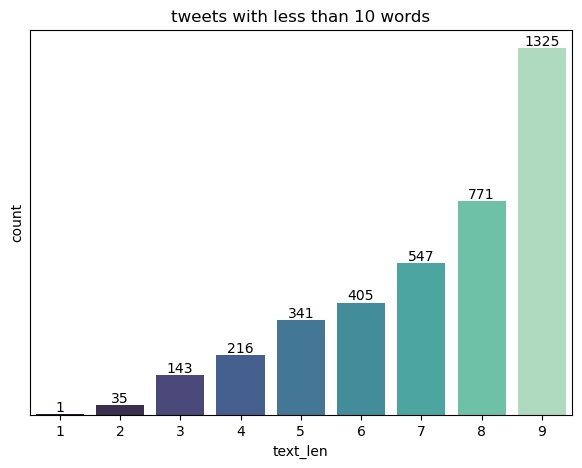

In [81]:
plt.figure(figsize=(7, 5))
ax= sns.countplot(x="text_len", data= df[df["text_len"]<10], palette="mako")
plt.title("tweets with less than 10 words")
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel("count")
plt.show()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42646 entries, 0 to 42645
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          42646 non-null  object 
 1   Firmen        42646 non-null  object 
 2   sentiment     42646 non-null  object 
 3   confidence    42646 non-null  float64
 4   tweet_length  42646 non-null  int64  
 5   text_len      42646 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ MB


In [83]:
df[df["text_len"]==2]["text"]

881              [ aapl]
5563     [AT_USER  aapl]
6910        [long  aapl]
9989            [  aapl]
17494        [wow  amzn]
18439            [ amzn]
18816       [fuck  baba]
18990            [ baba]
19764      [added  baba]
21777            [ csco]
22244           [ttg  d]
22255             [l  d]
22350           [est  d]
22990             [r  d]
23477             [5  d]
23480         [honxe  d]
23593             [b  d]
23771             [m  d]
23791           [l    d]
23842             [e  d]
24074             [p  d]
26314    [AT_USER  goog]
27424            [ goog]
30521             [  ko]
34728            [g  fb]
35356              [ fb]
37855            [ msft]
40715              [ tm]
40946              [  v]
40995             [a  v]
41029             [y  v]
41097          [gta   v]
41179       [AT_USER  v]
41419        [issued  v]
42271             [ wmt]
Name: text, dtype: object

In [84]:
df[df["text_len"]==4]["text"]

472       [AT_USER AT_USER  aapl 574.80]
579                       [ aapl  from ]
1123                    [ aapl 525 call]
1422              [ aapl uuuuaaawwwww !]
1484                [ aapl watch 537.91]
                      ...               
41112               [ v -   stockcharts]
41455                   [rt AT_USER  v ]
41527                         [₱ v  v ¥]
41610                   [ wmt wal-mart ]
41651    [shocking   wmt blames weather]
Name: text, Length: 216, dtype: object

In [85]:
df= df[df["text_len"]>4]

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42251 entries, 0 to 42645
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          42251 non-null  object 
 1   Firmen        42251 non-null  object 
 2   sentiment     42251 non-null  object 
 3   confidence    42251 non-null  float64
 4   tweet_length  42251 non-null  int64  
 5   text_len      42251 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.3+ MB
